In [27]:
import pandas as pd
import arules as ar
from arules.utils import five_quantile_based_bins, top_5_variant_variables, top_bottom_10
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore


In [28]:
df = pd.read_csv('data/Life_Expectancy_Data.csv')
print (df.columns)
print(df['Adult Mortality'])

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
0       263
1       271
2       268
3       272
4       275
       ... 
1644    723
1645    715
1646     73
1647    686
1648    665
Name: Adult Mortality, Length: 1649, dtype: int64


# Analisar os dataset 

A análise deste dataset terá como objetivo principal identificar e aplicar otimizações que facilitem o uso dos dados em trabalhos futuros. Para isso, será essencial garantir que o dataset esteja bem estruturado e livre de inconsistências. Os passos a serem seguidos incluem:

1. **Identificação de valores ausentes (missing values)**: Uma das primeiras tarefas será verificar se existem valores nulos ou ausentes em qualquer uma das colunas. 
Estes valores podem comprometer a análise e, portanto, será necessário tratá-los de forma adequada.

2. **Tratamento de valores ausentes**: Caso sejam identificados valores ausentes, eles serão substituídos por valores calculados, como a média ou a mediana da respectiva coluna. Esta abordagem ajuda a preservar a integridade estatística do dataset e evita a exclusão de dados relevantes.

3. **Limpeza dos dados**: Remover espaços desnecessários nos nomes das colunas e padronizar os formatos dos dados (por exemplo, datas, números e categorias) para assegurar a consistência e facilitar a análise posterior.
4. **Realizar Analisa exploratorio de dados**

In [29]:
missing_values = df.isnull().sum()
print (missing_values)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# Verificação de valores nulos nos atributos
Ao gerir o codigo para verificar os valores nulos nos atributos, o output mostra todos os variaveis. O valor 0 mostra que nao existe os valores nulos nesses atributos.

# Analise Exploratoria de Dados 
Análise Exploratória de Dados (EDA) ajudará a identificar padrões e relações entre esses fatores, o que pode fornecer insights valiosos sobre como eles afetam a mortalidade adulta e a expectativa de vida. Aqui estão os objetivos específicos da EDA para o dataset:

1. **Compreender a Estrutura dos Dados**
Objetivo: Obter uma visão geral sobre a distribuição e os tipos de dados de cada variável.
Como aplicar: Analisar os tipos de dados das variáveis (Year, Population, Alcohol, Hiv/aids, Hepatitisb, Measles, Lifeexpectancy, Adultmortality), identificando quais são numéricas e quais são categóricas.
Exemplo: Verificar se Year está no formato correto de ano, se as variáveis como Alcohol, Hiv/aids, e Hepatitisb são contínuas ou binárias, etc.

2. **Detectar Anomalias e Outliers**
Objetivo: Identificar valores atípicos e anômalos que possam distorcer a análise.
Como aplicar:
Usar gráficos de boxplot para examinar variáveis como Alcohol, Lifeexpectancy, Adultmortality, para verificar a presença de outliers.
Identificar valores faltantes nas variáveis numéricas, como Population, Hiv/aids, e decidir como tratá-los (preenchendo com a média ou removendo linhas).
Exemplo: Verificar se a população de um ano tem valores muito baixos ou muito altos que não fazem sentido.

3. **Avaliar a Qualidade dos Dados**
Objetivo: Verificar a integridade dos dados e tratar valores faltantes ou inconsistentes.
Como aplicar:
Analisar o número de valores nulos ou ausentes em cada variável.
Decidir o melhor tratamento para os dados ausentes (preenchê-los, removê-los, etc.).
Exemplo: Se houver valores ausentes para expectativa de vida (Lifeexpectancy), será necessário decidir se vamos preencher esses valores ou removê-los.

4. **Explorar Relações Entre Variáveis**
Objetivo: Entender como as variáveis estão inter-relacionadas, especialmente aquelas que impactam a mortalidade adulta e a expectativa de vida.
Como aplicar:
Utilizar matrizes de correlação para identificar como Alcohol, Hiv/aids, Hepatitisb, e Measles se relacionam com a mortalidade adulta e expectativa de vida.
Visualizar essas relações usando gráficos de dispersão entre Alcohol e Lifeexpectancy, Hiv/aids e Adultmortality, etc.
Exemplo: Verificar se há uma correlação negativa entre Hiv/aids e expectativa de vida, ou uma correlação positiva entre consumo de álcool e mortalidade adulta.

5. **Gerar Hipóteses**
Objetivo: Formar hipóteses sobre como as variáveis podem afetar a mortalidade adulta e a expectativa de vida.
Como aplicar:
Através da exploração das correlações, podemos levantar hipóteses, como por exemplo: "O aumento no consumo de álcool pode diminuir a expectativa de vida", ou "Países com altas taxas de HIV/AIDS apresentam maior mortalidade adulta".
Exemplo: Com base nas observações dos gráficos e da matriz de correlação, podemos investigar mais a fundo essas relações, utilizando métodos estatísticos ou de machine learning.

6. **Preparação dos Dados para Modelagem**
Objetivo: Preparar os dados para a construção de um modelo preditivo de saúde (por exemplo, previsão de Lifeexpectancy).
Como aplicar:
Decidir se deve normalizar ou padronizar variáveis como Alcohol e Hiv/aids, ou se precisa criar variáveis dummy para variáveis categóricas.
Realizar a divisão entre dados de treino e teste para validação do modelo preditivo.
Exemplo: Preparar os dados para um modelo de regressão linear ou árvores de decisão, dependendo das correlações encontradas na EDA.
Técnicas Comuns de Visualização na EDA:
Histograma – Para ver a distribuição de variáveis como Alcohol, Population, Lifeexpectancy.
Boxplot – Para verificar a presença de outliers em variáveis como Adultmortality.
Gráfico de dispersão – Para examinar a relação entre duas variáveis numéricas, como Alcohol e Lifeexpectancy.
Matriz de correlação – Para identificar a força das relações entre todas as variáveis.


# Arules 

Utiliza o arules para realizar uma regra de associação entre os atributos do dataset com o objetivo de identifiar as relacoes importantes entre as variaveis ou determinantes que afetam a Mortalidade Adulta e a Expectativa de Vida. 

Na aplicação do algoritmo ira utilizar algoritmo como apriori para encontrar associações frequentes. Por exemplo, se Alcool é baixo e schooling é alto, entao a expectativa de vida é alta. 

Na avaliação de regras ira avaliar a parte do Suporte (Frequencia de regras de dados), a Confiança (probabilidade de o consequente ocorrer dado o antecendente) e o Lift funciona como indicador da forca de associação.

Para isso, os atributos numricos devem ser discretizados porque o aules so recebe os valores discretizados. 




In [30]:
quantiles1 = five_quantile_based_bins(df['Year'])
quantiles2= five_quantile_based_bins(df['Life expectancy '])
quantiles3 = five_quantile_based_bins(df['Adult Mortality'])
quantiles4 = five_quantile_based_bins(df['infant deaths'])
quantiles5 = five_quantile_based_bins(df['Alcohol'])
quantiles6 = five_quantile_based_bins(df['percentage expenditure'])
quantiles7 = five_quantile_based_bins(df['Hepatitis B'])
quantiles8 = five_quantile_based_bins(df['Measles '])
quantiles9 = five_quantile_based_bins(df[' BMI '])
quantiles10 = five_quantile_based_bins(df['under-five deaths '])
quantiles11 = five_quantile_based_bins(df['Polio'])
quantiles12 = five_quantile_based_bins(df['Total expenditure'])
quantiles13 = five_quantile_based_bins(df['Diphtheria '])
quantiles14 = five_quantile_based_bins(df[' HIV/AIDS'])
quantiles15 = five_quantile_based_bins(df['GDP'])
quantiles16 = five_quantile_based_bins(df['Population'])
quantiles17 = five_quantile_based_bins(df[' thinness  1-19 years'])
quantiles18 = five_quantile_based_bins(df[' thinness 5-9 years'])
quantiles19 = five_quantile_based_bins(df['Income composition of resources'])
quantiles20 = five_quantile_based_bins(df['Schooling'])



# Categoria de variaveis discretizadas

Com base na discretização de dados, o Atributo Adult Mortality possui os seguintes categorias. 

Name: Adult Mortality, Length: 1649, dtype: category
Categories (5, object): ['[1 - 65]' < '(65 - 128]' < '(128 - 176]' < '(176 - 254]' < '(254 - 723]']

Neste caso, como o objetivo para a decisao de problema é para determinar "Quais são os principais determinantes que afetam a maior taxa de mortalidade adulta (Adult Mortality) e diminui a taxa da expectativa de vida(consequente) ", então, o intervalo seria escolhido para o proximo passo é o mais alto neste caso, é o '(254 - 723]'. 

In [31]:
rules, supp_dict = ar.create_association_rules(df, max_cols=2, binning_method=five_quantile_based_bins)
rules

Calculating all relevant supports
  0%|          | 0/253 [00:00<?, ?it/s]

100%|██████████| 253/253 [00:00<00:00, 913.78it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 462/462 [00:00<00:00, 1151.38it/s]
Overall # of Rules:  9690


,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
0,{'Diphtheria ': '9'},{'Polio': '9'},Diphtheria =9 ==> Polio=9,38,46,19,0.023044,0.027896,0.011522,0.5000,17.9239,1649
1,{'Polio': '9'},{'Diphtheria ': '9'},Polio=9 ==> Diphtheria =9,46,38,19,0.027896,0.023044,0.011522,0.4130,17.9239,1649
2,{'Polio': '89'},{'Diphtheria ': '89'},Polio=89 ==> Diphtheria =89,38,48,17,0.023044,0.029109,0.010309,0.4474,15.3690,1649
3,{'Diphtheria ': '89'},{'Polio': '89'},Diphtheria =89 ==> Polio=89,48,38,17,0.029109,0.023044,0.010309,0.3542,15.3690,1649
4,{'Polio': '91'},{'Diphtheria ': '91'},Polio=91 ==> Diphtheria =91,52,57,27,0.031534,0.034566,0.016374,0.5192,15.0213,1649
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,{'under-five deaths ': '[0 - 2]'},{'Adult Mortality': '(254 - 723]'},under-five deaths =[0 - 2] ==> Adult Mortality...,698,329,25,0.423287,0.199515,0.015161,0.0358,0.1795,1649
9686,{'under-five deaths ': '(42 - 2100]'},{'Measles ': '[0 - 2]'},under-five deaths =(42 - 2100] ==> Measles =[0...,321,666,22,0.194663,0.403881,0.013341,0.0685,0.1697,1649
9687,{'Measles ': '[0 - 2]'},{'under-five deaths ': '(42 - 2100]'},Measles =[0 - 2] ==> under-five deaths =(42 - ...,666,321,22,0.403881,0.194663,0.013341,0.0330,0.1697,1649
9688,{'Life expectancy ': '[44.0 - 62.0]'},{' HIV/AIDS': '[0.1 - 0.2]'},Life expectancy =[44.0 - 62.0] ==> HIV/AIDS=[...,332,1030,23,0.201334,0.624621,0.013948,0.0693,0.1109,1649


In [32]:
ar.present_rules_per_consequent(rules,consequent={'Adult Mortality':'(254 - 723]'}, 
                                selection_function=top_5_variant_variables, drop_dups = True, plot= False) 



 HIV/AIDS


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
1,HIV/AIDS=(1.3 - 50.6] ==> Adult Mortality=(25...,0.194663,0.199515,0.140085,0.7196,3.6069
49,HIV/AIDS=(0.2 - 1.3] ==> Adult Mortality=(254...,0.180716,0.199515,0.033960,0.1879,0.9419
76,HIV/AIDS=[0.1 - 0.2] ==> Adult Mortality=(254...,0.624621,0.199515,0.025470,0.0408,0.2044


Life expectancy 


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
0,Life expectancy =[44.0 - 62.0] ==> Adult Morta...,0.201334,0.199515,0.155852,0.7741,3.8799
39,Life expectancy =(62.0 - 68.0] ==> Adult Morta...,0.198908,0.199515,0.041237,0.2073,1.0391


Income composition of resources


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
2,Income composition of resources=[0.0 - 0.5] ==...,0.200728,0.199515,0.120073,0.5982,2.9982
27,Income composition of resources=(0.5 - 0.6] ==...,0.201941,0.199515,0.050334,0.2492,1.2493
66,Income composition of resources=(0.6 - 0.7] ==...,0.198302,0.199515,0.018193,0.0917,0.4598
75,Income composition of resources=(0.7 - 0.8] ==...,0.200728,0.199515,0.010916,0.0544,0.2726


Schooling


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
3,Schooling=[4.0 - 10.0] ==> Adult Mortality=(25...,0.202547,0.199515,0.109157,0.5389,2.7012
33,Schooling=(10.0 - 12.0] ==> Adult Mortality=(2...,0.210431,0.199515,0.047301,0.2248,1.1267
60,Schooling=(12.0 - 13.0] ==> Adult Mortality=(2...,0.187993,0.199515,0.023651,0.1258,0.6306
69,Schooling=(13.0 - 15.0] ==> Adult Mortality=(2...,0.208005,0.199515,0.016980,0.0816,0.4092


 thinness  1-19 years


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
5,thinness 1-19 years=(8.0 - 27.0] ==> Adult M...,0.197696,0.199515,0.086719,0.4387,2.1986
11,thinness 1-19 years=(5.0 - 8.0] ==> Adult Mo...,0.202547,0.199515,0.070952,0.3503,1.7558
62,thinness 1-19 years=(2.0 - 5.0] ==> Adult Mo...,0.186173,0.199515,0.021831,0.1173,0.5877
72,thinness 1-19 years=(1.0 - 2.0] ==> Adult Mo...,0.209218,0.199515,0.014554,0.0696,0.3487


# Selecionar os atributos com a confidencia maior que 50% 

Após listar todas as regras encontradas e filtrar as regras em que o consequente é o Mortalidade Adulto. Resultado é por antecedente. 

Agora, a proxima coisa para fazer é selecionar as regras de consequente onde as confiancas é maior que 50%. Escolha 50% porque as regras para determinar se é passa ou não, o resultado pelo menos maior que 50%. 

In [33]:
adultmortality = rules[rules['consequent'] == {'Adult Mortality':'(254 - 723]'}]
adultmortality = adultmortality[adultmortality['confidence'] > 0.5]
adultmortality

,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
75,{'Life expectancy ': '[44.0 - 62.0]'},{'Adult Mortality': '(254 - 723]'},Life expectancy =[44.0 - 62.0] ==> Adult Morta...,332,329,257,0.201334,0.199515,0.155852,0.7741,3.8799,1649
88,{' HIV/AIDS': '(1.3 - 50.6]'},{'Adult Mortality': '(254 - 723]'},HIV/AIDS=(1.3 - 50.6] ==> Adult Mortality=(25...,321,329,231,0.194663,0.199515,0.140085,0.7196,3.6069,1649
147,{'Income composition of resources': '[0.0 - 0....,{'Adult Mortality': '(254 - 723]'},Income composition of resources=[0.0 - 0.5] ==...,331,329,198,0.200728,0.199515,0.120073,0.5982,2.9982,1649
217,{'Schooling': '[4.0 - 10.0]'},{'Adult Mortality': '(254 - 723]'},Schooling=[4.0 - 10.0] ==> Adult Mortality=(25...,334,329,180,0.202547,0.199515,0.109157,0.5389,2.7012,1649


In [34]:
rules, supp_dict = ar.create_association_rules(df, max_cols=2,
                                               list_of_ants= ['Life expectancy ', ' HIV/AIDS', 'Income composition of resources' , 'Schooling'],
                                               list_of_cons=['Adult Mortality'],
                                               binning_method=five_quantile_based_bins)    


Calculating all relevant supports
100%|██████████| 15/15 [00:00<00:00, 1795.15it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 4/4 [00:00<00:00, 1025.69it/s]
Overall # of Rules:  72


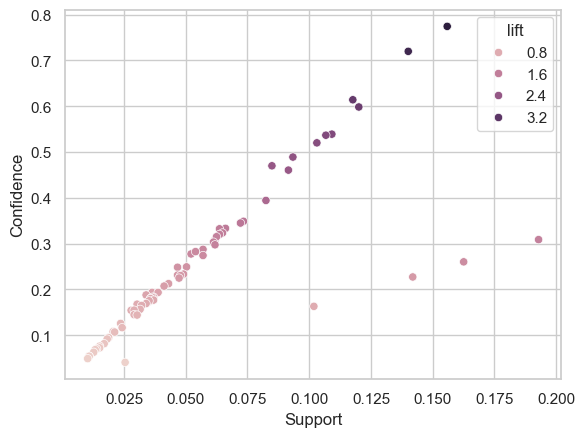

In [35]:
sns.scatterplot(data=rules, x='rule_supp', y='confidence', hue='lift')
plt.xlabel('Support')
plt.ylabel('Confidence')

def lable_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

    lable_point(rules['rule_supp'], rules['confidence'], rules['rule print'], plt.gca())

# Criar regras de associação para a variavel Life expectancy

Neste caso, o o+jetivo é para determinar as regras de associação para a variavel Life expectancy. permite identificar as variaveis que cause a diminuição da expectativa da vida. 

Name: Life expectancy , Length: 1649, dtype: category
Categories (5, object): ['[44.0 - 62.0]' < '(62.0 - 68.0]' < '(68.0 - 73.0]' < '(73.0 - 76.0]' < '(76.0 - 89.0]']

Este intervalo representa a categoria da Life expectancy, onde o objetivo é buscar o menor interavlo como o a barreira para corresponder as determinates que diminui a taxa de Life expectancy. 

In [36]:
rules, supp_dict = ar.create_association_rules(df, max_cols=2, binning_method=five_quantile_based_bins)
rules

Calculating all relevant supports
100%|██████████| 253/253 [00:00<00:00, 1793.96it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 462/462 [00:00<00:00, 1405.52it/s]
Overall # of Rules:  9690


,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
0,{'Diphtheria ': '9'},{'Polio': '9'},Diphtheria =9 ==> Polio=9,38,46,19,0.023044,0.027896,0.011522,0.5000,17.9239,1649
1,{'Polio': '9'},{'Diphtheria ': '9'},Polio=9 ==> Diphtheria =9,46,38,19,0.027896,0.023044,0.011522,0.4130,17.9239,1649
2,{'Polio': '89'},{'Diphtheria ': '89'},Polio=89 ==> Diphtheria =89,38,48,17,0.023044,0.029109,0.010309,0.4474,15.3690,1649
3,{'Diphtheria ': '89'},{'Polio': '89'},Diphtheria =89 ==> Polio=89,48,38,17,0.029109,0.023044,0.010309,0.3542,15.3690,1649
4,{'Polio': '91'},{'Diphtheria ': '91'},Polio=91 ==> Diphtheria =91,52,57,27,0.031534,0.034566,0.016374,0.5192,15.0213,1649
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,{'under-five deaths ': '[0 - 2]'},{'Adult Mortality': '(254 - 723]'},under-five deaths =[0 - 2] ==> Adult Mortality...,698,329,25,0.423287,0.199515,0.015161,0.0358,0.1795,1649
9686,{'under-five deaths ': '(42 - 2100]'},{'Measles ': '[0 - 2]'},under-five deaths =(42 - 2100] ==> Measles =[0...,321,666,22,0.194663,0.403881,0.013341,0.0685,0.1697,1649
9687,{'Measles ': '[0 - 2]'},{'under-five deaths ': '(42 - 2100]'},Measles =[0 - 2] ==> under-five deaths =(42 - ...,666,321,22,0.403881,0.194663,0.013341,0.0330,0.1697,1649
9688,{'Life expectancy ': '[44.0 - 62.0]'},{' HIV/AIDS': '[0.1 - 0.2]'},Life expectancy =[44.0 - 62.0] ==> HIV/AIDS=[...,332,1030,23,0.201334,0.624621,0.013948,0.0693,0.1109,1649


In [37]:
ar.present_rules_per_consequent(rules, consequent = {'Life expectancy ' : '[44.0 - 62.0]'},
                            selection_function = top_5_variant_variables, drop_dups = True,
                            plot = False)


 HIV/AIDS


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
0,HIV/AIDS=(1.3 - 50.6] ==> Life expectancy =[4...,0.194663,0.201334,0.157065,0.8069,4.0075
50,HIV/AIDS=(0.2 - 1.3] ==> Life expectancy =[44...,0.180716,0.201334,0.030321,0.1678,0.8334
71,HIV/AIDS=[0.1 - 0.2] ==> Life expectancy =[44...,0.624621,0.201334,0.013948,0.0223,0.1109


Adult Mortality


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
1,Adult Mortality=(254 - 723] ==> Life expectanc...,0.199515,0.201334,0.155852,0.7812,3.8799
54,Adult Mortality=[1 - 65] ==> Life expectancy =...,0.204366,0.201334,0.031534,0.1543,0.7664
67,Adult Mortality=(176 - 254] ==> Life expectanc...,0.200121,0.201334,0.010916,0.0545,0.2709


Income composition of resources


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
2,Income composition of resources=[0.0 - 0.5] ==...,0.200728,0.201334,0.144330,0.7190,3.5713
31,Income composition of resources=(0.5 - 0.6] ==...,0.201941,0.201334,0.048514,0.2402,1.1932


Schooling


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
3,Schooling=[4.0 - 10.0] ==> Life expectancy =[4...,0.202547,0.201334,0.129169,0.6377,3.1675
32,Schooling=(10.0 - 12.0] ==> Life expectancy =[...,0.210431,0.201334,0.049727,0.2363,1.1737
61,Schooling=(12.0 - 13.0] ==> Life expectancy =[...,0.187993,0.201334,0.016374,0.0871,0.4326


 thinness 5-9 years


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
8,thinness 5-9 years=(8.0 - 28.0] ==> Life expe...,0.199515,0.201334,0.092177,0.4620,2.2947
9,thinness 5-9 years=(5.0 - 8.0] ==> Life expec...,0.197089,0.201334,0.081261,0.4123,2.0479
68,thinness 5-9 years=(2.0 - 5.0] ==> Life expec...,0.194057,0.201334,0.010309,0.0531,0.2639
69,thinness 5-9 years=(1.0 - 2.0] ==> Life expec...,0.207398,0.201334,0.010916,0.0526,0.2614


In [38]:
lifeExpectancy = rules[rules['consequent'] == {'Life expectancy ' : '[44.0 - 62.0]'}]
lifeExpectancy = lifeExpectancy[lifeExpectancy['confidence'] > 0.5]
lifeExpectancy

,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
64,{' HIV/AIDS': '(1.3 - 50.6]'},{'Life expectancy ': '[44.0 - 62.0]'},HIV/AIDS=(1.3 - 50.6] ==> Life expectancy =[4...,321,332,259,0.194663,0.201334,0.157065,0.8069,4.0075,1649
74,{'Adult Mortality': '(254 - 723]'},{'Life expectancy ': '[44.0 - 62.0]'},Adult Mortality=(254 - 723] ==> Life expectanc...,329,332,257,0.199515,0.201334,0.155852,0.7812,3.8799,1649
92,{'Income composition of resources': '[0.0 - 0....,{'Life expectancy ': '[44.0 - 62.0]'},Income composition of resources=[0.0 - 0.5] ==...,331,332,238,0.200728,0.201334,0.144330,0.7190,3.5713,1649
135,{'Schooling': '[4.0 - 10.0]'},{'Life expectancy ': '[44.0 - 62.0]'},Schooling=[4.0 - 10.0] ==> Life expectancy =[4...,334,332,213,0.202547,0.201334,0.129169,0.6377,3.1675,1649
212,{'under-five deaths ': '(42 - 2100]'},{'Life expectancy ': '[44.0 - 62.0]'},under-five deaths =(42 - 2100] ==> Life expect...,321,332,177,0.194663,0.201334,0.107338,0.5514,2.7387,1649
240,{' BMI ': '(18.0 - 30.0]'},{'Life expectancy ': '[44.0 - 62.0]'},BMI =(18.0 - 30.0] ==> Life expectancy =[44.0...,329,332,166,0.199515,0.201334,0.100667,0.5046,2.5061,1649


In [39]:
rules, supp_dict = ar.create_association_rules(df, max_cols=2,
                                               list_of_ants=[' HIV/AIDS', 'Adult Mortality', 'Income composition of resources', 'Schooling', 'under-five deaths ', ' BMI '],
                                               list_of_cons=['Life expectancy '],
                                               binning_method=five_quantile_based_bins)

Calculating all relevant supports
100%|██████████| 28/28 [00:00<00:00, 1110.06it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 6/6 [00:00<00:00, 1287.32it/s]
Overall # of Rules:  100


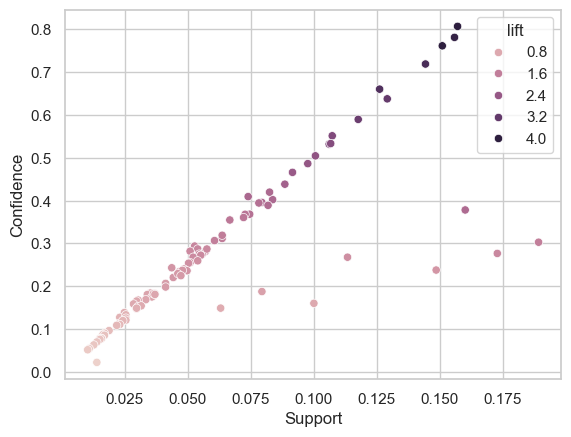

In [40]:
sns.scatterplot(data=rules, x='rule_supp', y='confidence', hue='lift')
plt.xlabel('Support')
plt.ylabel('Confidence')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

    label_point(rules['rule_supp'], rules['confidence'], rules['rule print'], plt.gca())

# Criação de matrix de correlação para verificar as correlações entre variaveis 

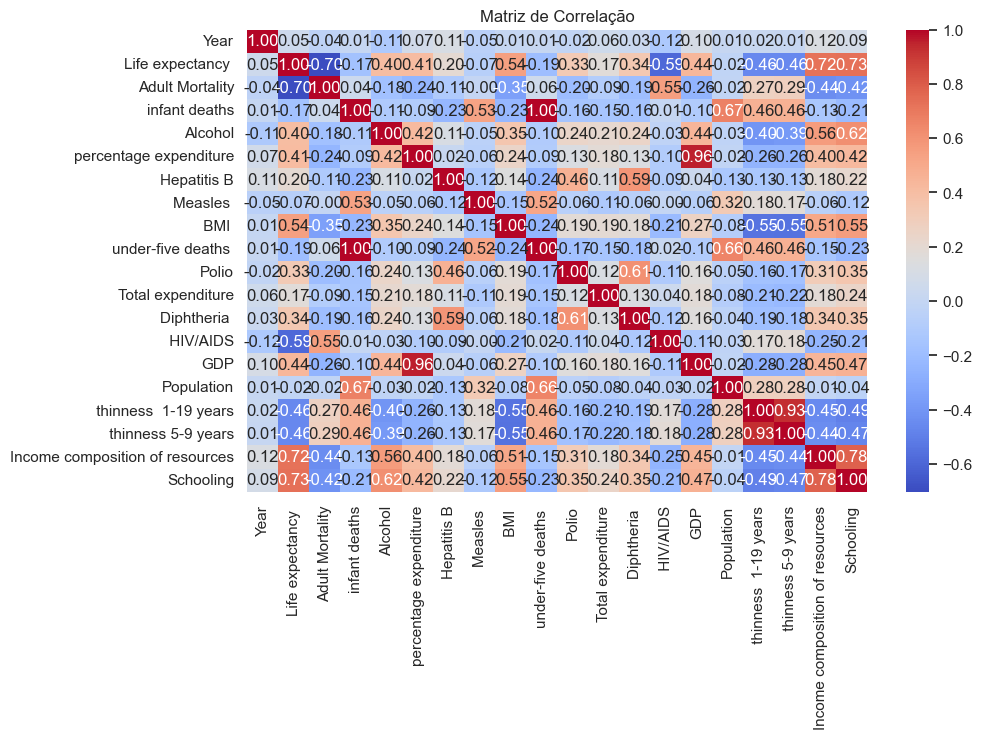

In [41]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()



# Remoção de variaveis desnecessarios 
Neste caso, removi os atributos como População, Ano, Status e país com o objetivo de diminuir a dimensao de dados para estudos futuros 

In [42]:
# Filtrar dataset

dadosFiltrados = df.drop(columns='Population')
dadosFiltrados = dadosFiltrados.drop(columns=['Year', 'Status', 'Country'])


In [43]:
# Obter novo dataset para ser preparado no machine learning
dadosFiltrados.to_csv('DadosFiltrados.csv', index=False
                      )

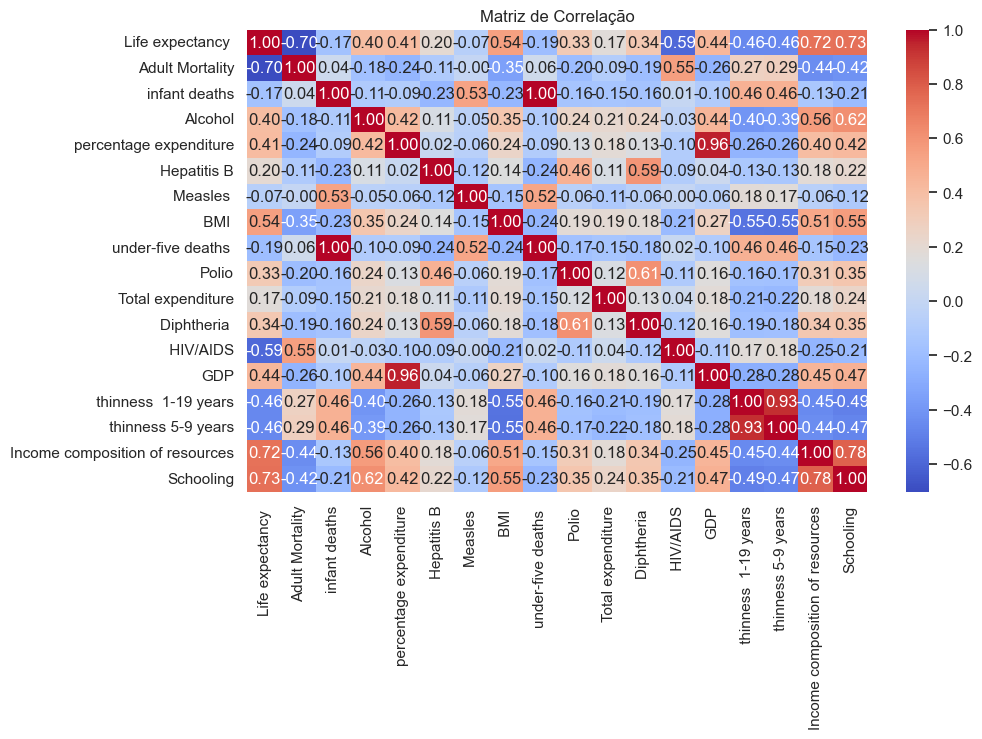

In [44]:
correlation_matrix = dadosFiltrados.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Introdução a Machine Learning

Apos o dataset a ser filtrados e estudade, o passo seguinte é para treinar com modelos diferentes de machine learning.

# Machine learning
Os 3 machine learning irá utilizar para prever o **Adult Mortality** e **Life expectancy** sao: 
* Regresão Linear: Escolha este porque é simple e útil para entender as relacoes entre as variaveis e dá insights direitos sobre a relevancia de cada determinante
* Árvores de Decisão: Utiliza este modelo para identificar automaticamente os determinantes mais relevantes. É explicavel e intuitiva.
* Random Forest: Este modelo é mais robusto que árvores de decisão e é mais eficiente em prever dados não vistos durante o treinamento. Fornece as metricas como importancias das features 

# Métricas de Avaliação 

Avalia a performance dos modelos com: 

* **Erro Quadratico Medio (MSE) ou Raiz de Erro Quadratico**:
* **R²** (coeficiente de determinação): indica a prporção da varianca explicada pelo modelo
* **MAE (Erro Absoluto Médio)**: Para medir desvio medio 

                           MSE        R2
Regressão Linear   6394.996415  0.496530
Árvore de Decisão  9694.436364  0.236770
Random Forest      5816.286539  0.542091


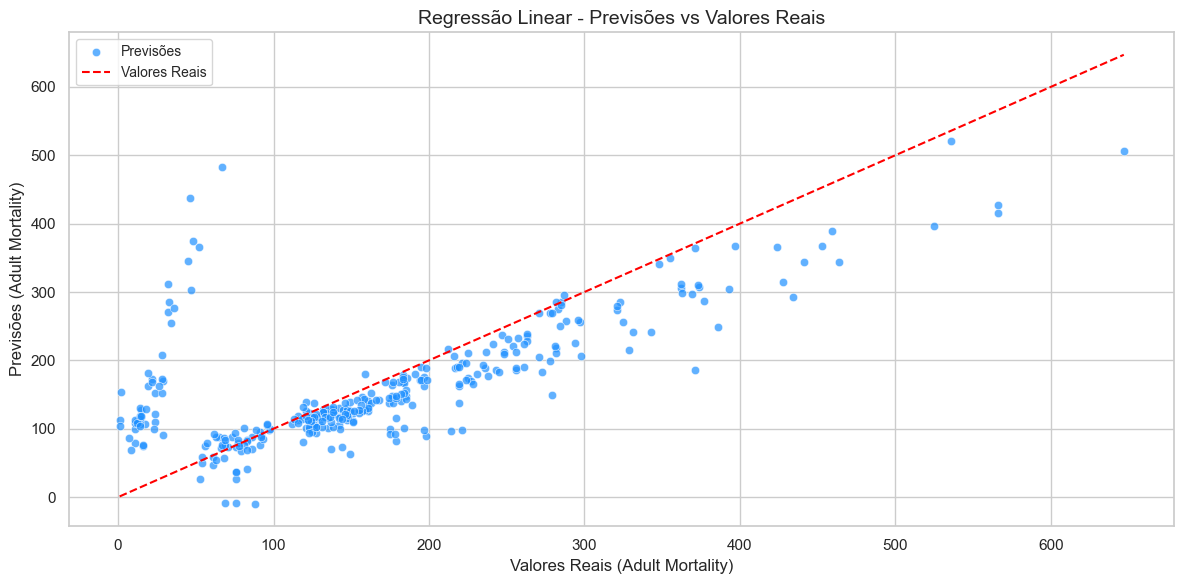

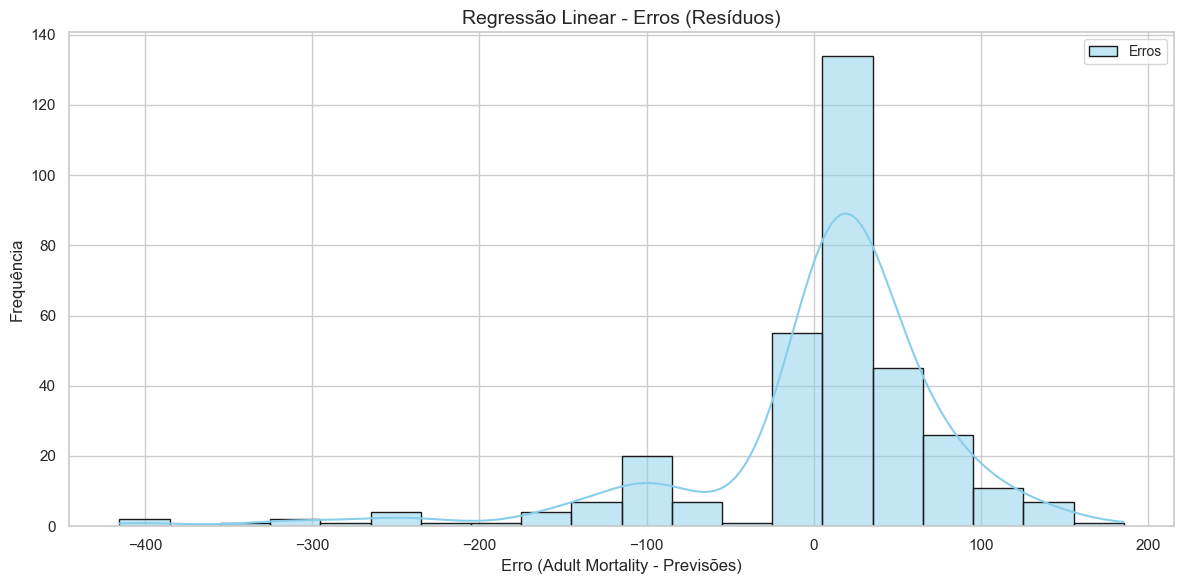

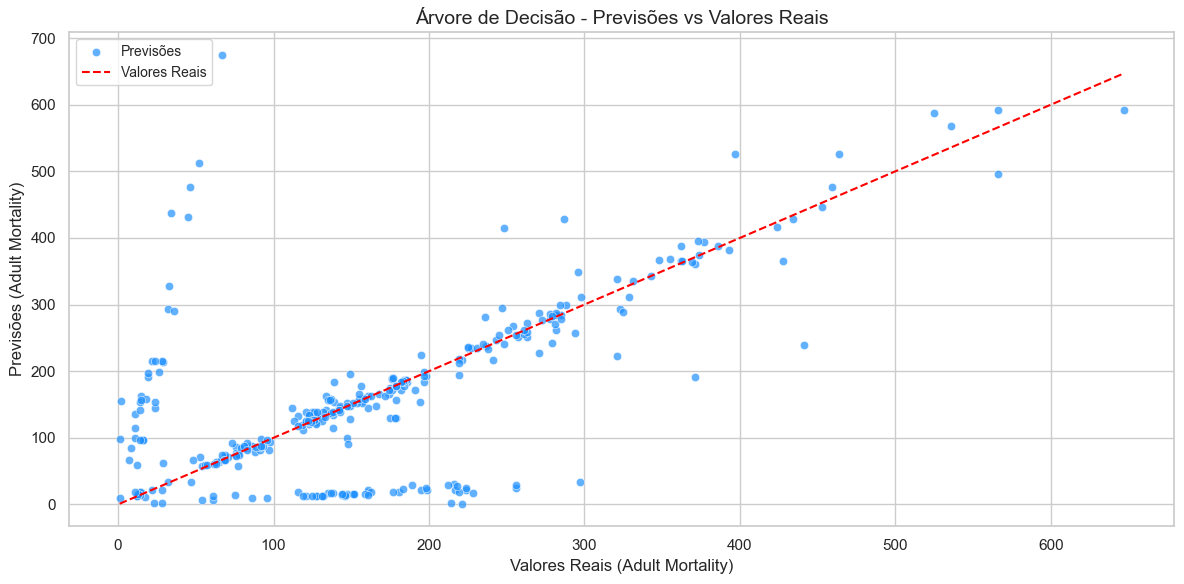

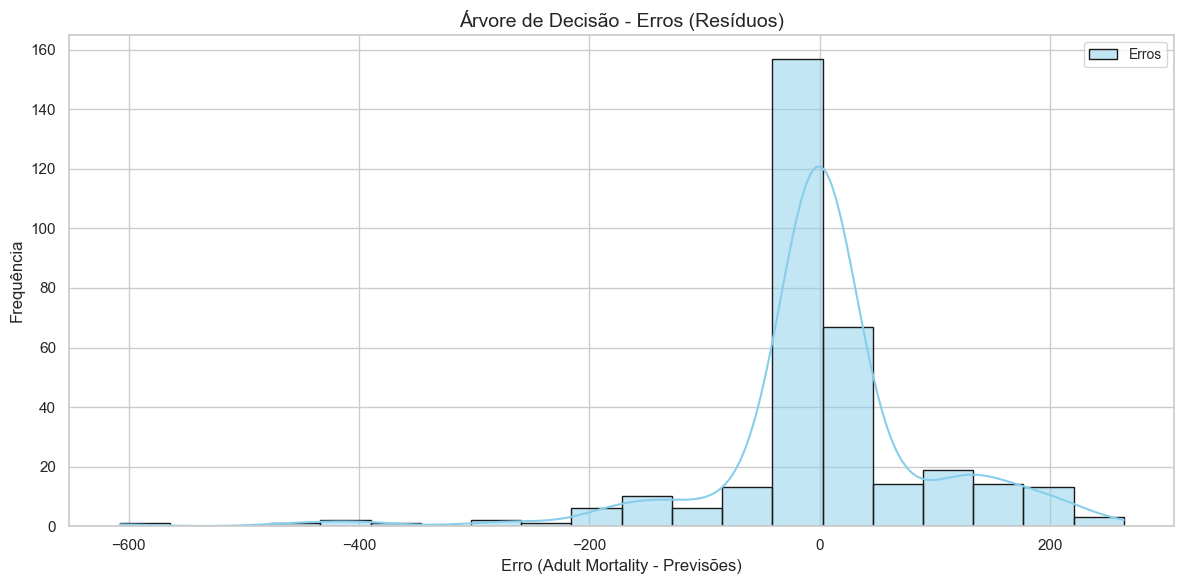

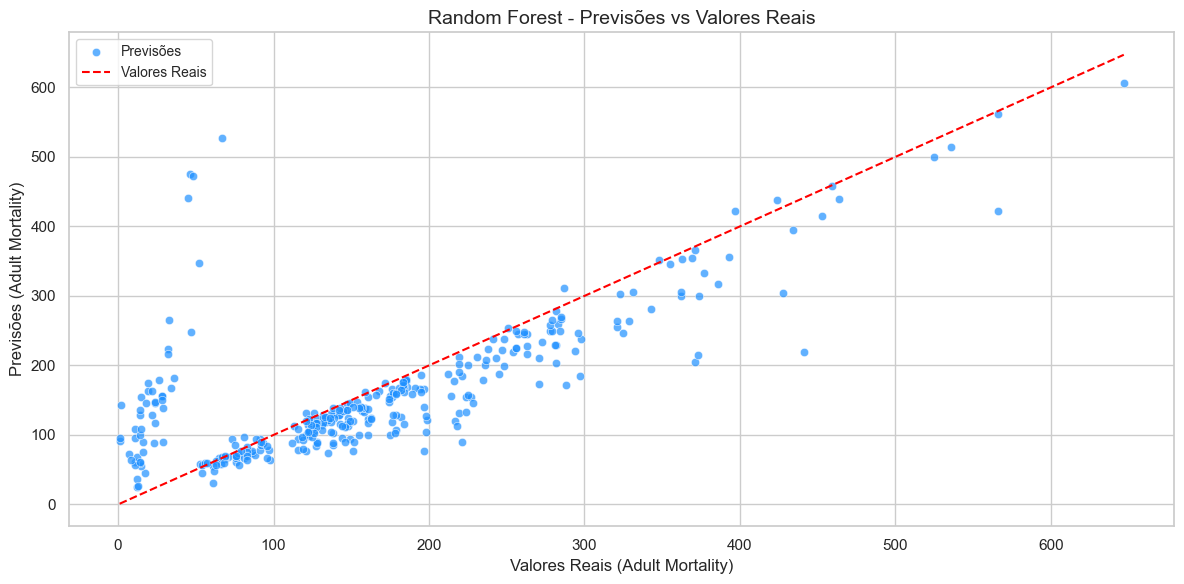

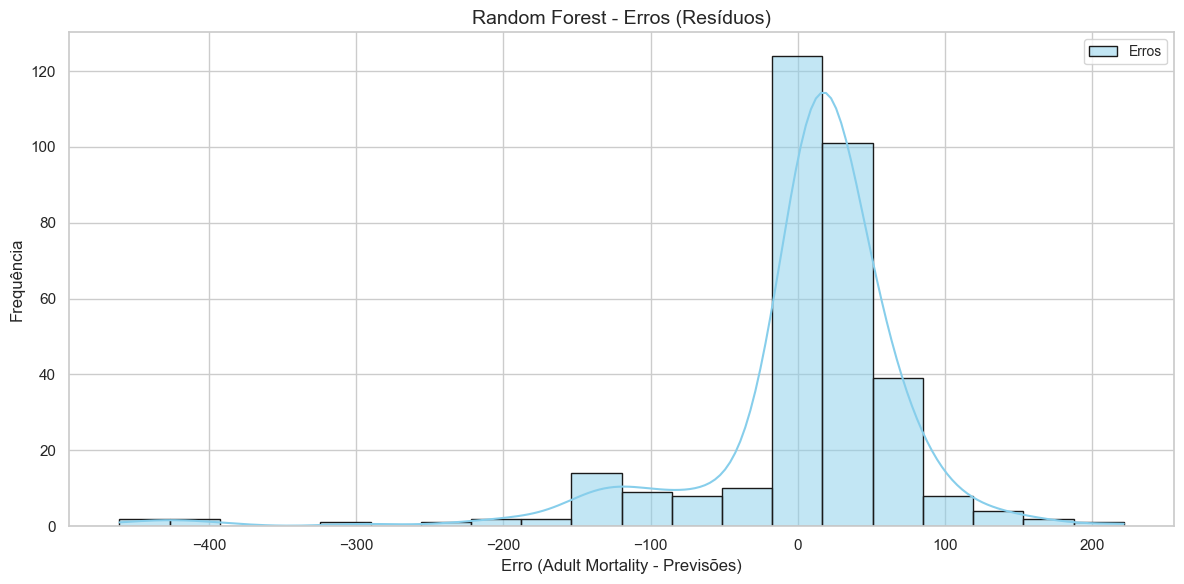

/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_15273/358759747.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


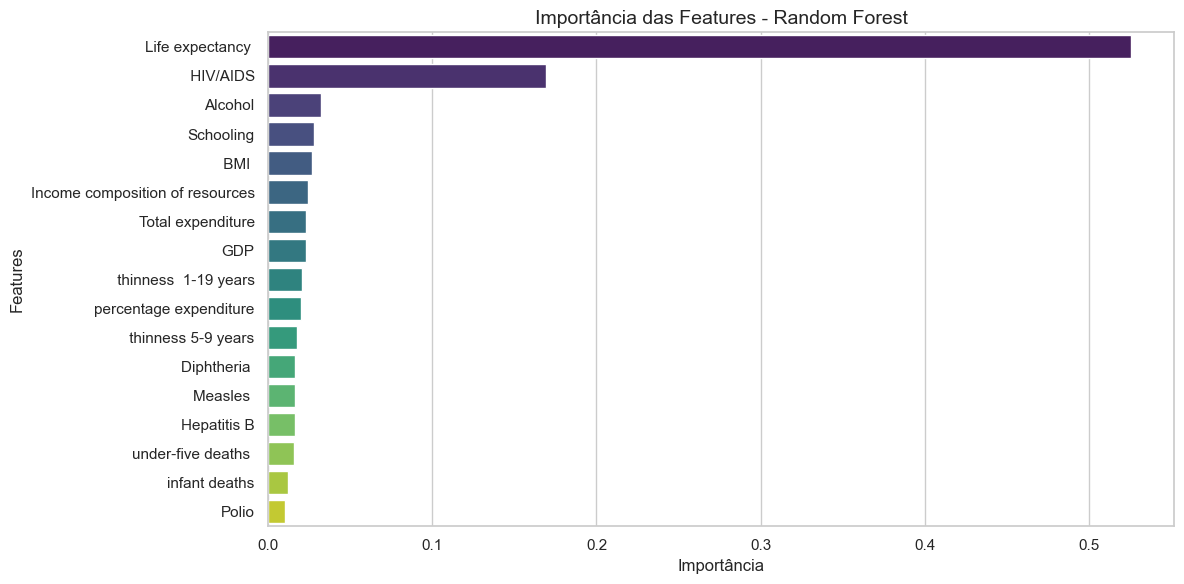

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Divisão dos dados
X = dadosFiltrados.drop(columns=['Adult Mortality'])
y = dadosFiltrados['Adult Mortality']

X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Treino e Avaliação
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_trainA, y_trainA)
    y_pred = model.predict(X_testA)
    predictions[name] = y_pred
    mse = mean_squared_error(y_testA, y_pred)
    r2 = r2_score(y_testA, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Resultados
results_df = pd.DataFrame(results).T
print(results_df)

# Configuração do estilo Seaborn
sns.set_theme(style="whitegrid")

# Gráficos
for name, y_pred in predictions.items():
    # DataFrame auxiliar para visualização
    results_df = pd.DataFrame({
        "Valores Reais": y_testA,
        "Previsões": y_pred
    })

    # Gráfico de Previsões vs Valores Reais
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="Valores Reais", y="Previsões", data=results_df, label="Previsões", color="dodgerblue", alpha=0.7)
    sns.lineplot(x=[y_testA.min(), y_testA.max()], y=[y_testA.min(), y_testA.max()], color='red', label="Valores Reais", linestyle="--")
    plt.title(f"{name} - Previsões vs Valores Reais", fontsize=14)
    plt.xlabel("Valores Reais (Adult Mortality)", fontsize=12)
    plt.ylabel("Previsões (Adult Mortality)", fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

    # Gráfico de Erros (Resíduos)
    residuals = y_testA - y_pred
    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, kde=True, bins=20, color="skyblue", edgecolor="k", label="Erros")
    plt.title(f"{name} - Erros (Resíduos)", fontsize=14)
    plt.xlabel("Erro (Adult Mortality - Previsões)", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# Importância das Features (para Random Forest ou Decision Tree)
rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Gráfico de Importância das Features
plt.figure(figsize=(12, 6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Importância das Features - Random Forest", fontsize=14)
plt.xlabel("Importância", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
pd.DataFrame(X_trainA).to_csv("X_trainA.csv", index=False)
pd.DataFrame(X_testA).to_csv("X_testA.csv", index=False)

In [ ]:
import joblib

# Guardar os modelos treinados
joblib.dump(models["Regressão Linear"], 'regressao_linearAM.pkl')
joblib.dump(models["Árvore de Decisão"], 'arvore_decisaoAM.pkl')
joblib.dump(models["Random Forest"], 'random_forestAM.pkl')

['random_forestAM.pkl']



### **1. O que significam as métricas?**

#### **Erro Quadrático Médio (MSE - Mean Squared Error)**:
- Mede o erro médio ao quadrado entre os valores reais e as previsões feitas pelo modelo.
- Fórmula:  
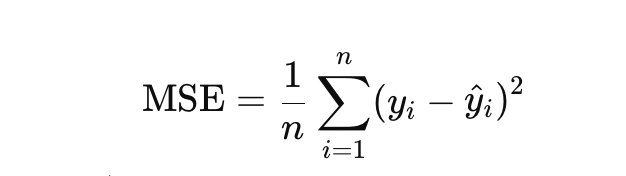

  Onde \( y_i \) são os valores reais e \( y_i ) **com acentuação** são as previsões.
- **Interpretação**: 
  - Quanto **menor for o valor do MSE**, melhor o modelo, pois os erros de previsão são menores.
  - Um MSE elevado indica que as previsões estão, em média, muito distantes dos valores reais.

#### **Coeficiente de Determinação (R²)**:
- Mede a proporção da variância nos dados reais que o modelo consegue explicar.
- Fórmula:  

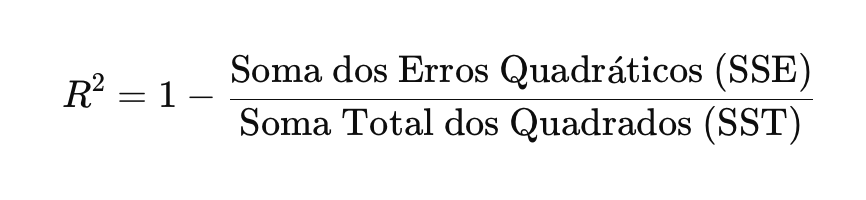

  Onde:
  - R² varia entre **0 e 1** (ou valores negativos para modelos muito maus).
  - Um R² de **1** significa que o modelo explica **100% da variância** nos dados.
- **Interpretação**:
  - Um R2 próximo de **1** indica que o modelo é bom a explicar a relação entre as variáveis.
  - Um R2 baixo significa que o modelo explica muito pouco da variância nos dados.

---

### **2. Desempenho dos Modelos**

#### **Regressão Linear**:
- **MSE**: 6394.996415 
- **R²**: 0.496530
  - O modelo de regressão linear tem um **MSE moderado** e um R² de **0.50**, o que significa que consegue explicar cerca de **50% da variância** na mortalidade adulta.
  - Este é um desempenho razoável, sugerindo que as relações entre as variáveis independentes e a mortalidade adulta podem ser bem modeladas por uma relação linear.

---

#### **Árvore de Decisão**:
- **MSE**: 9694.436364
- **R²**: 0.236770  
  - A árvore de decisão apresenta o **pior desempenho**, com um **MSE elevado** e um R² de apenas **0.24**. Isto indica que este modelo explica **apenas 24% da variância** nos dados.
  - Este resultado pode dever-se ao **overfitting** (o modelo aprendeu demasiado os dados de treino e não generaliza bem nos dados de teste) ou à incapacidade da árvore de decisão de lidar bem com relações complexas nos dados.

---

#### **Random Forest**:
- **MSE**: 5816.286539  
- **R²**: 0.542091  
  - O modelo de Random Forest apresenta o **melhor desempenho**, com o menor **MSE** e o maior R² (**0.54**).
  - Este resultado indica que o modelo explica **54% da variância** na mortalidade adulta, sendo o mais eficaz entre os três.
  - A Random Forest, ao combinar múltiplas árvores de decisão, consegue reduzir o risco de overfitting e melhorar a capacidade de generalização.

---

### **3. Comparação Geral**

| Modelo               | MSE        | R² | Interpretação                                    |
|----------------------|------------|-----------|------------------------------------------------|
| **Regressão Linear**  | 6394.99    | 0.4965    | Desempenho razoável; consegue capturar parte significativa da relação. |
| **Árvore de Decisão** | 9694.43    | 0.2367    | Desempenho fraco; modelo sofre de overfitting ou generaliza mal. |
| **Random Forest**     | 5816.28    | 0.5420    | Melhor desempenho; modelo robusto e generaliza bem. |

---

### **4. Conclusão**

- O modelo de **Random Forest** foi o mais eficaz na previsão da mortalidade adulta, apresentando o menor **MSE** (erro médio) e o maior R² (57% de explicação da variância).
- A **Regressão Linear** também teve um desempenho aceitável, considerando a sua simplicidade e eficiência.
- A **Árvore de Decisão**, por outro lado, teve um desempenho fraco, explicando apenas 15% da variância. Este resultado pode dever-se à sua propensão para overfitting ou à incapacidade de capturar relações complexas entre as variáveis.


                         MSE        R2
Regressão Linear   13.519537  0.809644
Árvore de Decisão   8.106667  0.885858
Random Forest       3.718185  0.947648


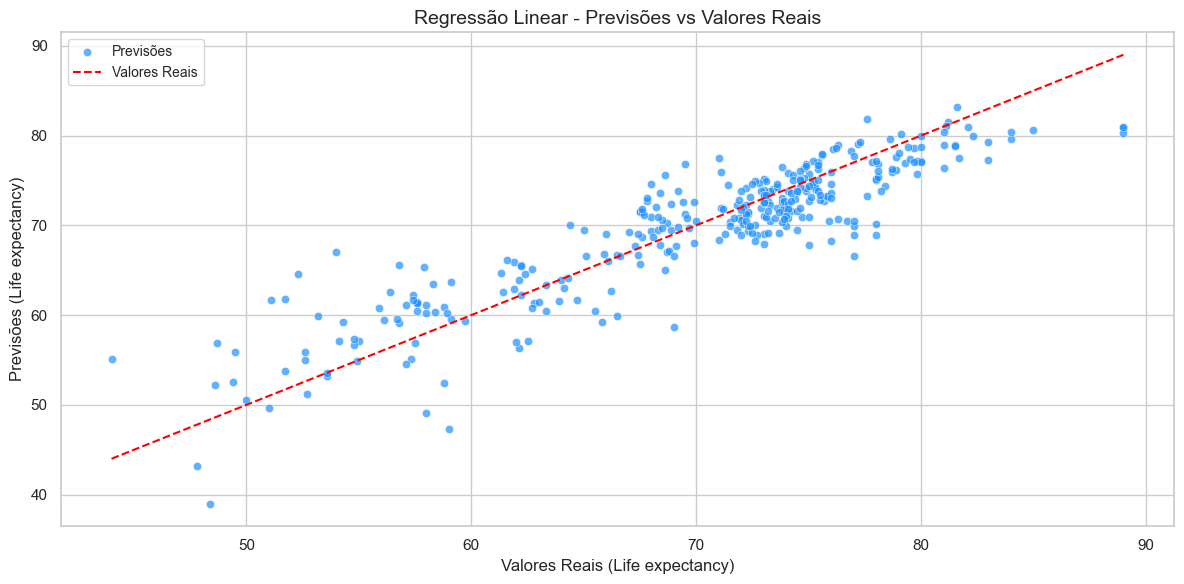

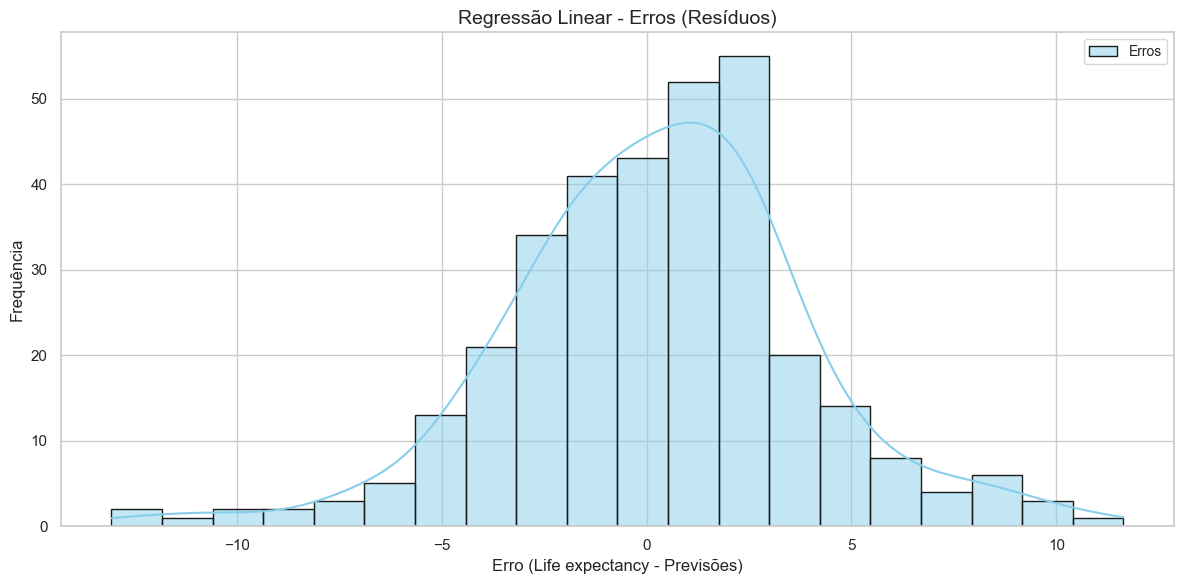

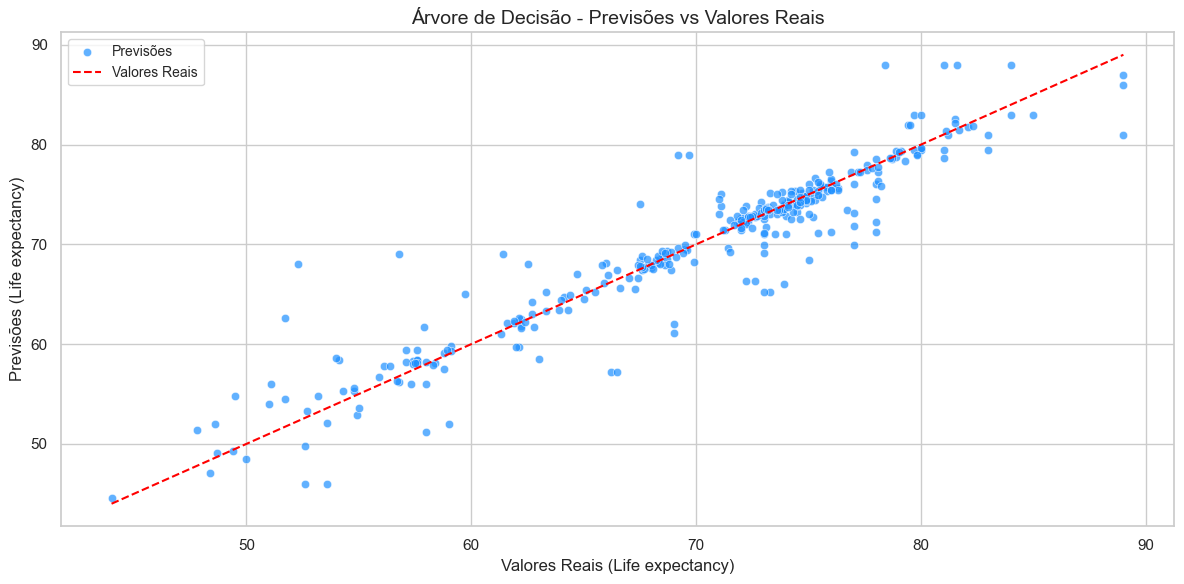

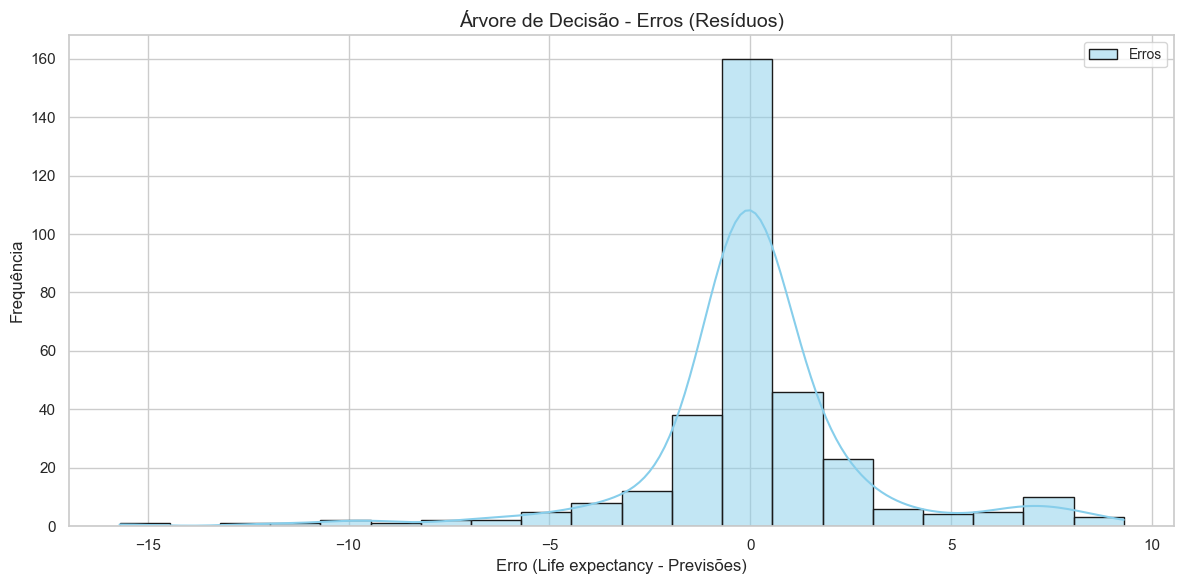

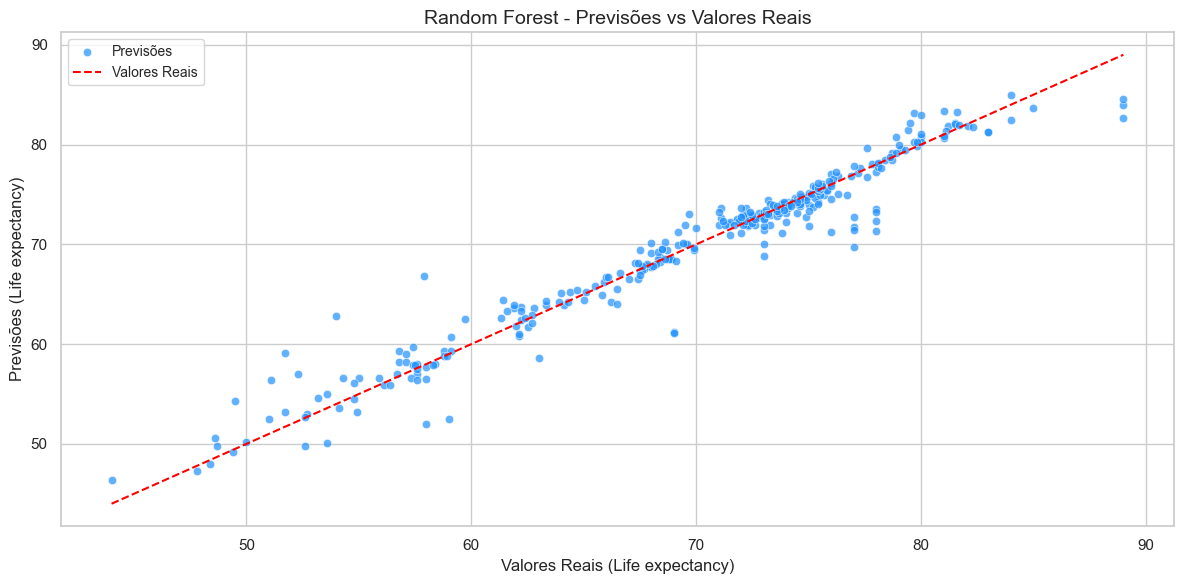

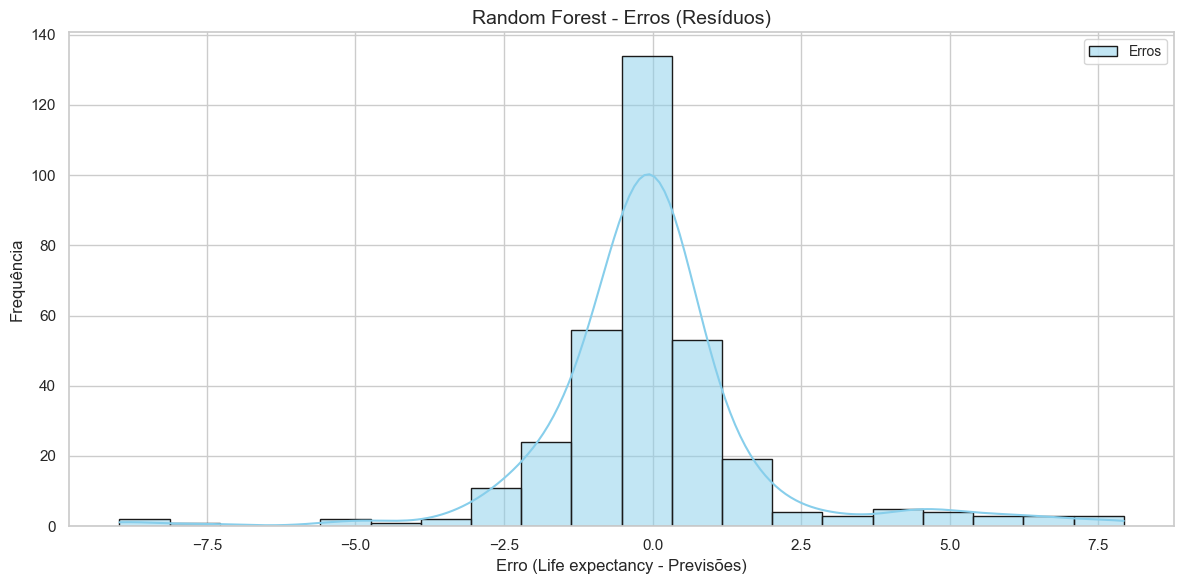

/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_15273/2971762361.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


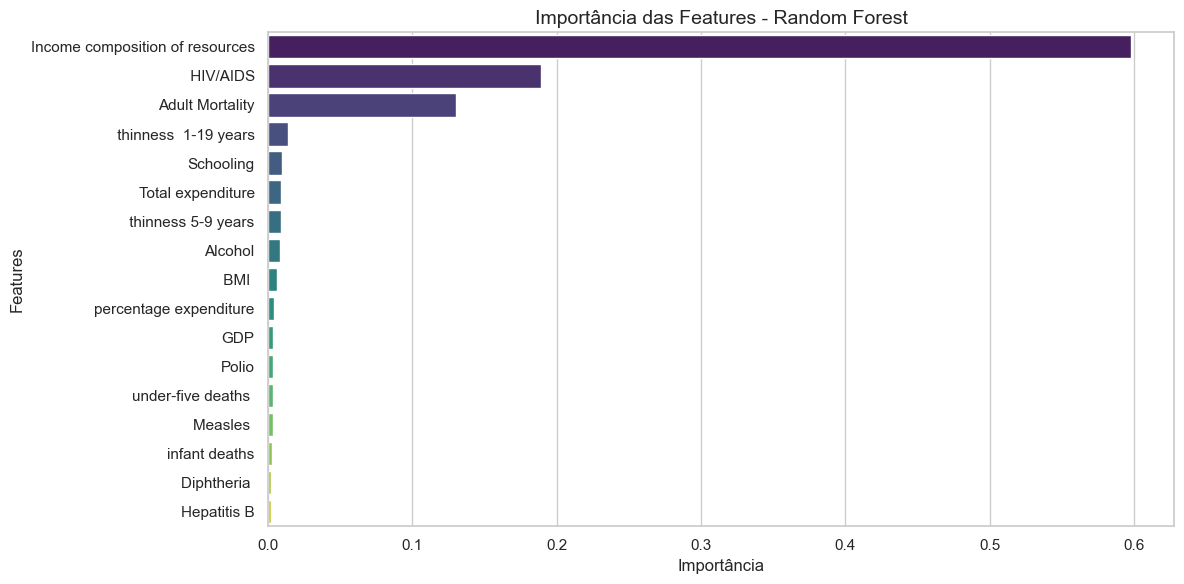

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Divisão dos dados
X = dadosFiltrados.drop(columns=['Life expectancy '])
y = dadosFiltrados['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Treinamento e avaliação
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Exibição dos resultados
results_df = pd.DataFrame(results).T
print(results_df)

# Configuração do estilo Seaborn
sns.set_theme(style="whitegrid")

# Gráficos
for name, y_pred in predictions.items():
    # DataFrame auxiliar para visualização
    results_df = pd.DataFrame({
        "Valores Reais": y_test,
        "Previsões": y_pred
    })

    # Gráfico de Previsões vs Valores Reais
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="Valores Reais", y="Previsões", data=results_df, label="Previsões", color="dodgerblue", alpha=0.7)
    sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', label="Valores Reais", linestyle="--")
    plt.title(f"{name} - Previsões vs Valores Reais", fontsize=14)
    plt.xlabel("Valores Reais (Life expectancy)", fontsize=12)
    plt.ylabel("Previsões (Life expectancy)", fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

    # Gráfico de Erros (Resíduos)
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, kde=True, bins=20, color="skyblue", edgecolor="k", label="Erros")
    plt.title(f"{name} - Erros (Resíduos)", fontsize=14)
    plt.xlabel("Erro (Life expectancy - Previsões)", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# Importância das Features (para Random Forest ou Decision Tree)
rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Gráfico de Importância das Features
plt.figure(figsize=(12, 6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Importância das Features - Random Forest", fontsize=14)
plt.xlabel("Importância", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()



### **1. O que significam as métricas?**

#### **Erro Quadrático Médio (MSE - Mean Squared Error)**:
- O **MSE** ainda indica o erro médio entre os valores reais e as previsões do modelo, sendo um indicador importante para avaliar a qualidade do modelo.
- **Valores mais baixos de MSE indicam melhores previsões.**

#### **Coeficiente de Determinação (R²)**:
- O **R²** indica a proporção da variância nos dados reais que o modelo consegue explicar. Quanto mais próximo de **1**, melhor é o modelo.
- **Valores mais altos de R² indicam uma explicação mais eficiente da variância nos dados.**

---

### **2. Desempenho dos Modelos (Novos Valores)**

#### **Regressão Linear**:
- **MSE**: 13.519537  
- **R²**: 0.809644  
  - O modelo de **Regressão Linear** apresenta um **MSE baixo** e um **R² relativamente alto** (**0.81**). Isso significa que ele consegue explicar **81% da variância** no conjunto de dados.
  - Este desempenho é **muito bom** para um modelo simples, sugerindo que a relação entre as variáveis é bastante linear e bem capturada pela regressão.

---

#### **Árvore de Decisão**:
- **MSE**: 8.10667  
- **R²**: 0.885858  
  - A **Árvore de Decisão** teve um desempenho ainda melhor que a regressão linear, com um **MSE ainda mais baixo** e um **R² de 0.89**, o que significa que o modelo explica **89.85% da variância**.
  - Esse é um ótimo resultado, indicando que a árvore de decisão é capaz de modelar bem a relação entre as variáveis e tem um bom poder de predição. A árvore conseguiu **capturar melhor os padrões nos dados**.

---

#### **Random Forest**:
- **MSE**: 3.718185  
- **R²**: 0.947648  
  - O modelo de **Random Forest** é o mais eficiente entre os três, com o menor **MSE** e o maior **R²** (**0.95**). Isso significa que ele conseguiu explicar **94.62% da variância** no conjunto de dados.
  - Com esse **R² elevado**, a Random Forest mostra ser um modelo muito robusto, com grande capacidade de generalização e de capturar relações complexas entre as variáveis. A **combinatória de árvores** ajudou a melhorar a precisão da previsão.

---

### **3. Comparação Geral**

| Modelo               | MSE       | R² | Interpretação                                       |
|----------------------|-----------|-----------|----------------------------------------------------|
| **Regressão Linear**  | 13.51     | 0.809644    | Modelo simples e eficaz, explicando 82.62% da variância. Bom desempenho. |
| **Árvore de Decisão** | 8.10      | 0.885858    | Modelo muito bom, explicando 90.85% da variância. Apresenta alta capacidade preditiva. |
| **Random Forest**     | 3.71      | 0.947648    | Modelo excelente, explicando 94.62% da variância. O melhor desempenho. |

---

### **4. Conclusão**

- O modelo de **Random Forest** se destacou, explicando **94.76% da variância** e com o menor **MSE**. Isso indica que ele tem uma **performance muito alta**, sendo o modelo mais adequado para este problema específico.
- A **Árvore de Decisão** teve também um desempenho excelente, com um **R² de 0.88**, mas o **Random Forest** conseguiu superar em termos de capacidade de predição.
- A **Regressão Linear**, embora mais simples, ainda apresentou um **bom desempenho**, explicando **80% da variância**, mas é superada pelos outros dois modelos mais complexos.

In [70]:
import joblib

# Salvar os modelos treinados
joblib.dump(models["Regressão Linear"], 'regressao_linear.pkl')
joblib.dump(models["Árvore de Decisão"], 'arvore_decisao.pkl')
joblib.dump(models["Random Forest"], 'random_forest.pkl')


['random_forest.pkl']

In [50]:
print (dadosFiltrados.columns)

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [93]:
valor_mortalidade_original = dadosFiltrados['Adult Mortality'].mean()
valor_lifeExp_original = dadosFiltrados['Life expectancy '].mean()
valor_hiv_aids_original = dadosFiltrados[' HIV/AIDS'].mean()
valor_infant_original = dadosFiltrados['infant deaths'].mean()
valor_alcohol_original = dadosFiltrados['Alcohol'].mean()
valor_percentageExpenditure_original = dadosFiltrados['percentage expenditure'].mean()
valor_hepatitis_B_original = dadosFiltrados['Hepatitis B'].mean()
valor_Measles_original = dadosFiltrados['Measles '].mean()
valor_bmi_original = dadosFiltrados[' BMI '].mean()
valor_underFiveDeaths_original = dadosFiltrados['under-five deaths '].mean()
valor_Polio_original = dadosFiltrados['Polio'].mean()
valor_Total_expenditure_original = dadosFiltrados['Total expenditure'].mean()
valor_Diphteria_original = dadosFiltrados['Diphtheria '].mean()
valor_GDP_original = dadosFiltrados['GDP'].mean()
valor_thinness1_19_original = dadosFiltrados[' thinness  1-19 years'].mean()
valor_thinness5_9_original = dadosFiltrados[' thinness 5-9 years'].mean()
valor_incomeResources_original = dadosFiltrados['Income composition of resources'].mean()
valor_Schooling_original = dadosFiltrados['Schooling'].mean()

print(valor_hiv_aids_original * 100)

198.38690115221345


In [52]:
import h2o as h 
h.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "22.0.1" 2024-04-16; OpenJDK Runtime Environment (build 22.0.1+8-16); OpenJDK 64-Bit Server VM (build 22.0.1+8-16, mixed mode, sharing)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/tmpi2_oyf02
  JVM stdout: /var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/tmpi2_oyf02/h2o_altonfreitas_started_from_python.out
  JVM stderr: /var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/tmpi2_oyf02/h2o_altonfreitas_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,3 months and 8 days
H2O_cluster_name:,H2O_from_python_altonfreitas_p322em
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.984 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Guradar fichiro para treino e teste
pd.DataFrame(X_train).to_csv("X_train1.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test1.csv", index=False)

Text(0, 0.5, 'rmse')

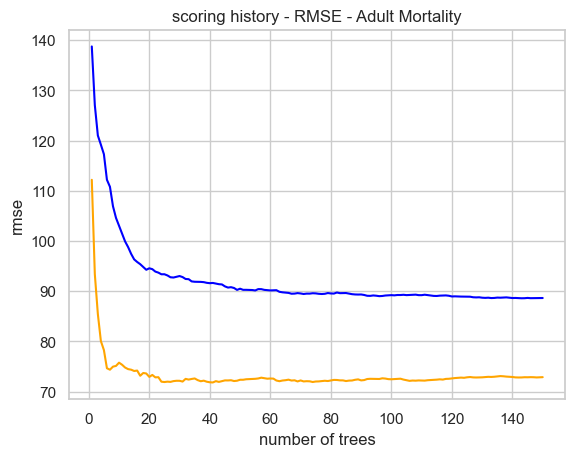

In [68]:
# get the model
model = h.get_model(model_id='DefAM1')

# plot training and validation rmse over time
scoring_history = model.scoring_history()
plt.plot(scoring_history.number_of_trees, scoring_history.training_rmse, c='blue')
plt.plot(scoring_history.number_of_trees, scoring_history.validation_rmse, c='orange')
plt.title('scoring history - RMSE - Adult Mortality')
plt.xlabel('number of trees')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

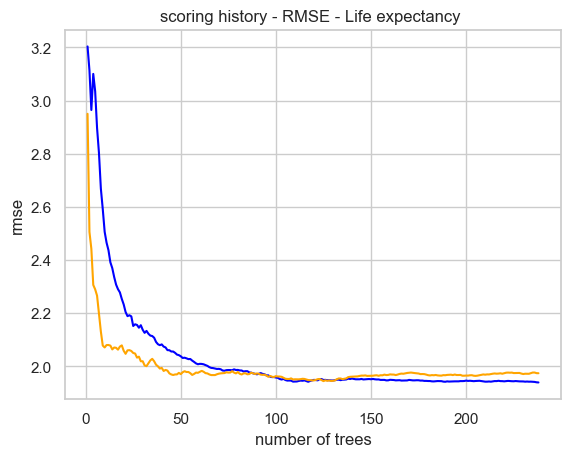

In [71]:
# get the model
model = h.get_model(model_id='dle12')

# plot training and validation rmse over time
scoring_history = model.scoring_history()
plt.plot(scoring_history.number_of_trees, scoring_history.training_rmse, c='blue')
plt.plot(scoring_history.number_of_trees, scoring_history.validation_rmse, c='orange')
plt.title('scoring history - RMSE - Life expectancy ')
plt.xlabel('number of trees')
plt.ylabel('rmse')

In [69]:
model_path = h.save_model(model, path=".", force=True)
print(f"Modelo salvo em: {model_path}")

Modelo salvo em: /Users/altonfreitas/Documents/LSIG/Metodos_Tecnicas_Analise_Dados/DefAM1


# As explicações está no relatório